In [83]:
import requests   
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## 1) Exiba dois box plots lado a lado, um para cada estado, dos índices solicitados:
a - Rendimento nominal médio mensal per capita (3974, censo Demográfico 2010)

In [66]:
url = "https://servicodados.ibge.gov.br/api/v3/agregados/3974/periodos/2010/variaveis/3948?localidades=N6[N3[15,17]]&classificacao=12085[100543]|58[95253]"

response_url = requests.get(url)
data_rend = response_url.json()
for i in data_rend:
  for key in i['resultados']:
    json = key
data_rend = pd.json_normalize(json['series'])
data_rend.rename(columns = {'localidade.id':'id','localidade.nivel.id':'nivel_id','localidade.nome':'local','serie.2010':'rendimento','localidade.nivel.nome':'nivel_nome'},inplace=True)
data_rend

,id,nivel_id,nivel_nome,local,rendimento
0,1500107,N6,Município,Abaetetuba - PA,313.9
1,1500131,N6,Município,Abel Figueiredo - PA,441.3
2,1500206,N6,Município,Acará - PA,237.0
3,1500305,N6,Município,Afuá - PA,228.8
4,1500347,N6,Município,Água Azul do Norte - PA,314.4
...,...,...,...,...,...
277,1721208,N6,Município,Tocantinópolis - TO,439.7
278,1721257,N6,Município,Tupirama - TO,441.7
279,1721307,N6,Município,Tupiratins - TO,372.1
280,1722081,N6,Município,Wanderlândia - TO,403.1


In [67]:
data_rend['MUN'] = [ item.split(' - ')[0] for item in data_rend['local']]
data_rend['UF'] = [ item.split(' - ')[1] for item in data_rend['local']]
data_rend

,id,nivel_id,nivel_nome,local,rendimento,MUN,UF
0,1500107,N6,Município,Abaetetuba - PA,313.9,Abaetetuba,PA
1,1500131,N6,Município,Abel Figueiredo - PA,441.3,Abel Figueiredo,PA
2,1500206,N6,Município,Acará - PA,237.0,Acará,PA
3,1500305,N6,Município,Afuá - PA,228.8,Afuá,PA
4,1500347,N6,Município,Água Azul do Norte - PA,314.4,Água Azul do Norte,PA
...,...,...,...,...,...,...,...
277,1721208,N6,Município,Tocantinópolis - TO,439.7,Tocantinópolis,TO
278,1721257,N6,Município,Tupirama - TO,441.7,Tupirama,TO
279,1721307,N6,Município,Tupiratins - TO,372.1,Tupiratins,TO
280,1722081,N6,Município,Wanderlândia - TO,403.1,Wanderlândia,TO


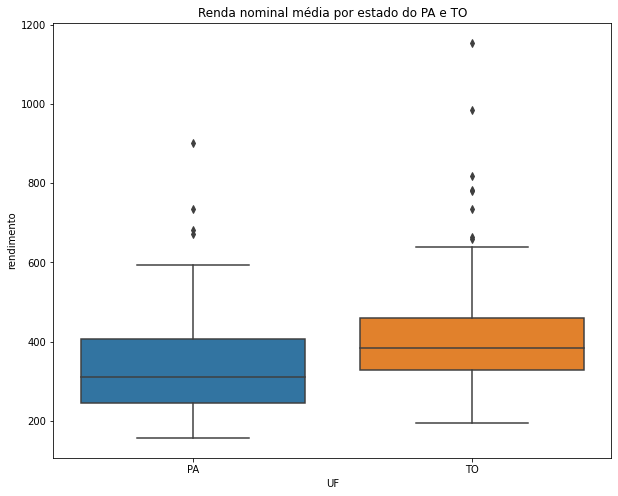

In [72]:
data_rend['rendimento'] = data_rend['rendimento'].astype('float')

fig, ax = plt.subplots(figsize=(10, 8))

ax.set_title('Renda nominal média por estado do PA e TO')
ax.set_xlabel('UF')
ax.set_ylabel('Renda Nominal')

sns.boxplot(data=data_rend, x='UF', y='rendimento', ax=ax)
plt.show()

b - Número de cabeças de bovinos Total (1224 - Censo Agropecuário 2006)

In [114]:
url = 'https://servicodados.ibge.gov.br/api/v3/agregados/1224/periodos/2006/variaveis/2057?localidades=N6[N3[15,17]]&classificacao=12947[0]'
response_url = requests.get(url)
data_agro = response_url.json()
for i in data_agro:
  for key in i['resultados']:
    json = key
data_agro = pd.json_normalize(json['series'])
data_agro.rename(columns = {'localidade.id':'id','localidade.nivel.id':'nivel_id','UF':'local','serie.2006':'quantidade','localidade.nivel.nome':'nivel_nome'},inplace=True)
data_agro['MUN'] = [ item.split(' - ')[0] for item in data_agro['localidade.nome']]
data_agro['UF'] = [ item.split(' - ')[1] for item in data_agro['localidade.nome']]
data_agro

,id,nivel_id,nivel_nome,localidade.nome,quantidade,MUN,UF
0,1500107,N6,Município,Abaetetuba - PA,4197,Abaetetuba,PA
1,1500131,N6,Município,Abel Figueiredo - PA,39168,Abel Figueiredo,PA
2,1500206,N6,Município,Acará - PA,22072,Acará,PA
3,1500305,N6,Município,Afuá - PA,3325,Afuá,PA
4,1500347,N6,Município,Água Azul do Norte - PA,372992,Água Azul do Norte,PA
...,...,...,...,...,...,...,...
277,1721208,N6,Município,Tocantinópolis - TO,18803,Tocantinópolis,TO
278,1721257,N6,Município,Tupirama - TO,7283,Tupirama,TO
279,1721307,N6,Município,Tupiratins - TO,11702,Tupiratins,TO
280,1722081,N6,Município,Wanderlândia - TO,35706,Wanderlândia,TO


In [115]:
#tem uma coluna com um X impedindo os dados de ser do tipo float 
display(data_agro[data_agro['quantidade']=='X'])
data_agro.loc[data_agro['quantidade']=='X', 'quantidade'] = np.nan
data_agro['quantidade'] = data_agro['quantidade'].astype('float')
data_agro.quantidade.isna().sum()
data_agro.dropna(subset=['quantidade'],inplace=True)
display(data_agro[data_agro['quantidade']=='X'])

,id,nivel_id,nivel_nome,localidade.nome,quantidade,MUN,UF
9,1500800,N6,Município,Ananindeua - PA,X,Ananindeua,PA


,id,nivel_id,nivel_nome,localidade.nome,quantidade,MUN,UF


In [116]:
data_agro['quantidade'].dtype

dtype('float64')

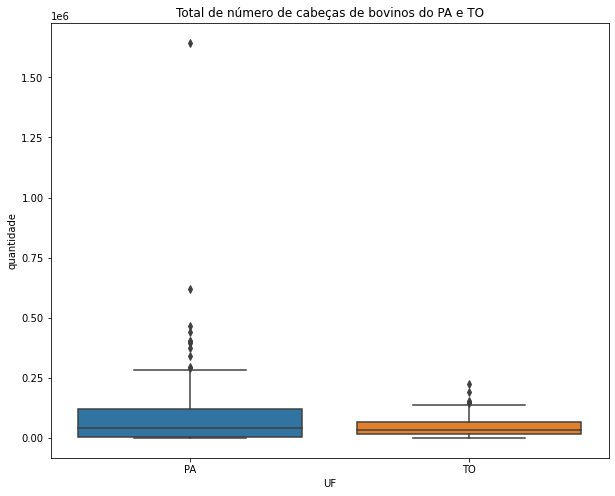

In [118]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.set_title('Total de número de cabeças de bovinos do PA e TO')
ax.set_xlabel('UF')
ax.set_ylabel('Quantidade de cabeçãs bovinas')

sns.boxplot(data=data_agro, x='UF', y='quantidade', ax=ax)
plt.show()